In [1]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

import torch
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from torch import nn
import torch.nn.functional as F

from causal_util import load_env
from causal_util.collect_data import EnvDataCollector
from matplotlib import pyplot as plt
from keychest.keychestenv import keychest_obs3d_to_obs2d, keychest_obs2d_to_image
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
import cloudpickle as pickle
from causal_util.helpers import one_hot_encode

In [2]:
ckpt = '/home/sergei/ray_results/5x5_test_fit_kc/main_fcn_9fccb_00000_0_2020-12-18_07-24-03/checkpoint_20000/checkpoint'

In [3]:
with open(ckpt, 'rb') as f:
    learner = pickle.load(f)

Make environment KeyChest-v0 None {}


In [4]:
env = learner.env
h, w, c = env.engine._observation.shape

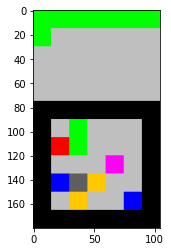

In [5]:
obs = env.reset()
obs = obs.reshape(h, w, c)
plt.imshow(keychest_obs2d_to_image(keychest_obs3d_to_obs2d(obs)))
plt.show()

In [6]:
learner.collect_steps()

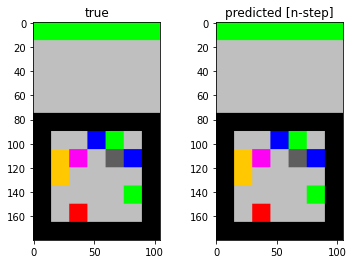

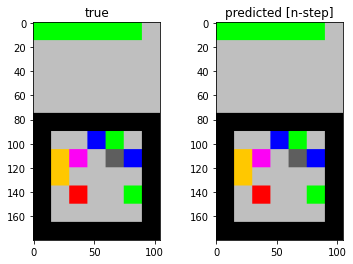

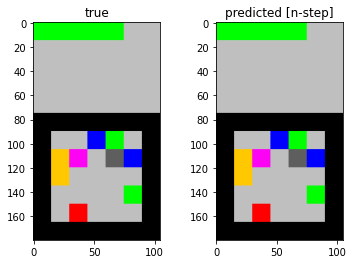

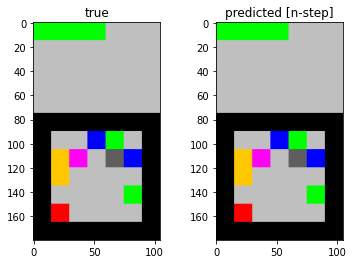

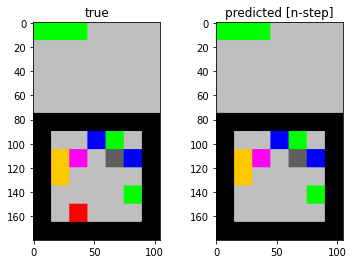

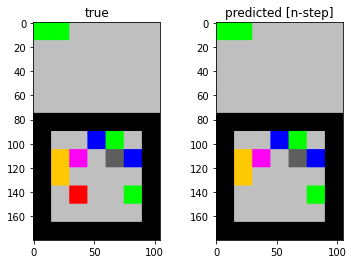

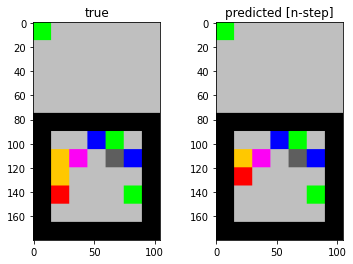

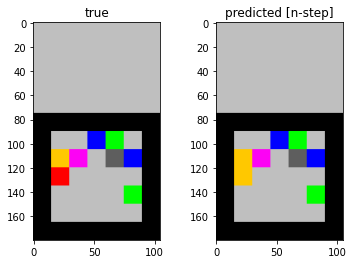

In [7]:
obs = env.reset()
obs_model = torch.tensor(obs).to(learner.device)

while True:
    action = env.action_space.sample()
    act_one_hot = one_hot_encode(env.action_space.n, action)
    
    obs_model = learner.model.forward(
        obs_model.unsqueeze(0),
        torch.tensor(act_one_hot).to(learner.device).unsqueeze(0)
    )[0]
    
    obs_model_show = obs_model.cpu().detach().numpy().reshape(h, w, c) > 0.5
    
    obs, rew, done, info = env.step(action)
    
    plt.subplot(1, 2, 1)
    plt.title("true")
    obs_show = obs.reshape(h, w, c)
    plt.imshow(keychest_obs2d_to_image(keychest_obs3d_to_obs2d(obs_show)))
    plt.subplot(1, 2, 2)
    plt.title("predicted [n-step]")
    plt.imshow(keychest_obs2d_to_image(keychest_obs3d_to_obs2d(obs_model_show)))
    plt.show()
        
    if done: break

In [8]:
obs_model
obs = obs_model.detach().numpy().reshape(h, w, c) > 0.5
plt.imshow(keychest_obs2d_to_image(keychest_obs3d_to_obs2d(obs)))
plt.show()

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
obs